# 30 Day Map Challenge

## Day 7 - Raster

Plan: Map the night time lights of Egypt

In [1]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\30 Day Map Challenge Data\\Raster")

In [3]:
dem = rio.open("s30_e029_1arc_v3.tif")
dem_array = dem.read(1).astype('float64')

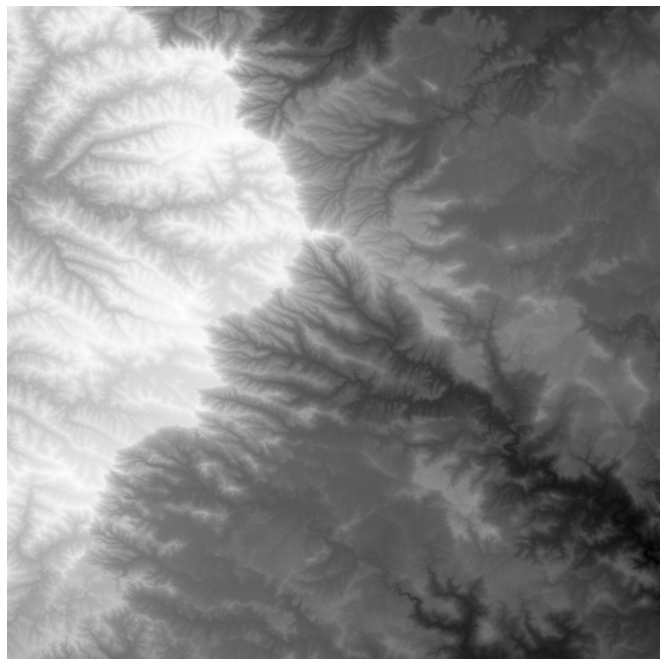

In [4]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
plt.axis("off")
plt.show()

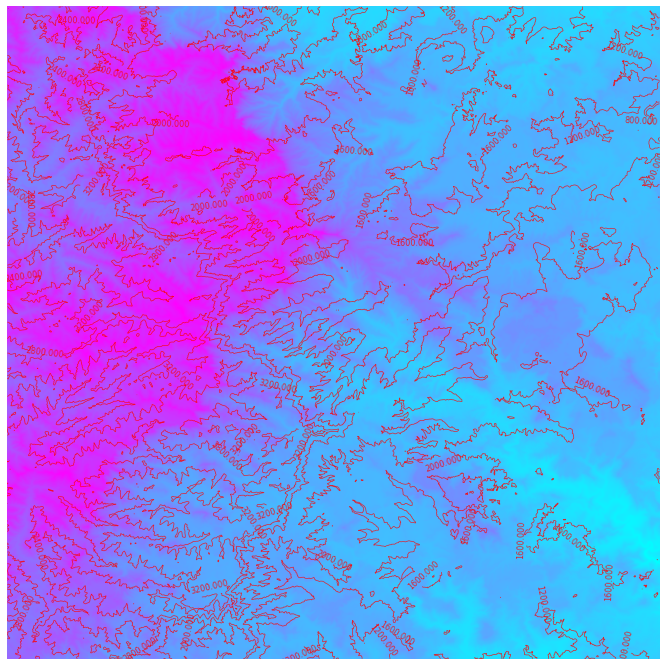

In [5]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='cool', ax=ax)
show(dem_array, contour=True, ax=ax, linewidths=0.7)
plt.axis("off")
plt.show()

AttributeError: 'AxesImage' object has no property 'figsize'

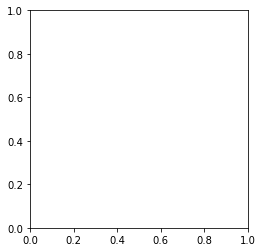

In [31]:
from osgeo import gdal
from numpy import gradient
from numpy import pi
from numpy import arctan
from numpy import arctan2
from numpy import sin
from numpy import cos
from numpy import sqrt
from numpy import zeros
from numpy import uint8
import matplotlib.pyplot as plt

def hillshade(array, azimuth, angle_altitude):
        
    x, y = gradient(array)
    slope = pi/2. - arctan(sqrt(x*x + y*y))
    aspect = arctan2(-x, y)
    azimuthrad = azimuth*pi / 180.
    altituderad = angle_altitude*pi / 180.
     
 
    shaded = sin(altituderad) * sin(slope)\
     + cos(altituderad) * cos(slope)\
     * cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2

ds = gdal.Open('s30_e029_1arc_v3.tif')  
band = ds.GetRasterBand(1)  
arr = band.ReadAsArray()

hs_array = hillshade(arr,315, 45)
ax = plt.imshow(hs_array,cmap='inferno', figsize=(20,20))
ax.set_axis_off();
ax.show()